# MLPClassifier for Multi-Class Classification

# DIGITS RECOGNITION

In [1]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.target[0])

0


<Figure size 432x288 with 0 Axes>

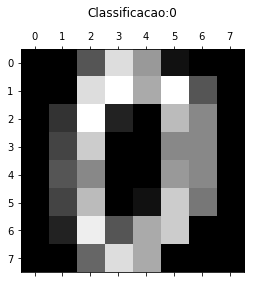

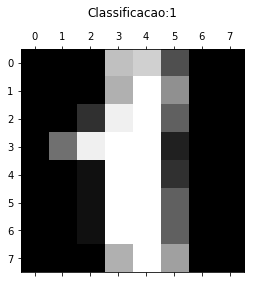

In [5]:
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])
    plt.title("Classificacao:" + str(digits.target[i]) + "\n")

In [8]:
import pandas as pd
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.head()

c:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [26]:
X = digits.data
y = digits.target
y[0]

0

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,),
                    activation = 'logistic',
                    solver='sgd', learning_rate_init=.4)
                    # verbose=10, 
                    # max_iter=600, alpha=1e-4,
                    # tol=1e-4, random_state=1,
                    
# Train the model on the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.975


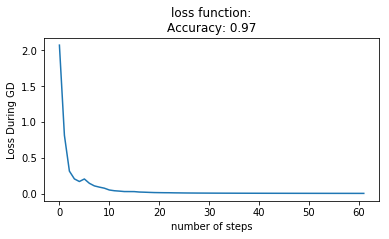

In [21]:
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(clf.loss_curve_)

plt.xlabel("number of steps") 
plt.ylabel("Loss During GD")
plt.title('loss function:\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
plt.show()

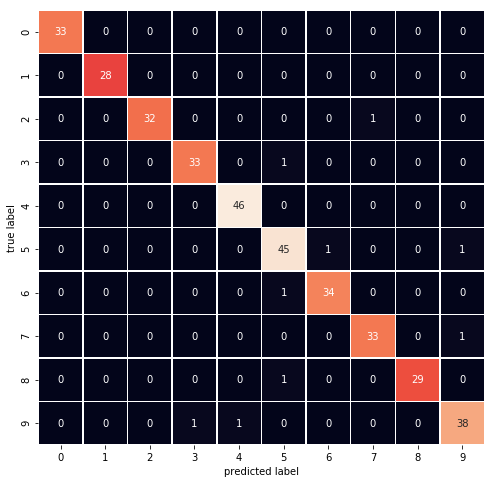

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

plot_confusion_matrix(y_test, y_pred)



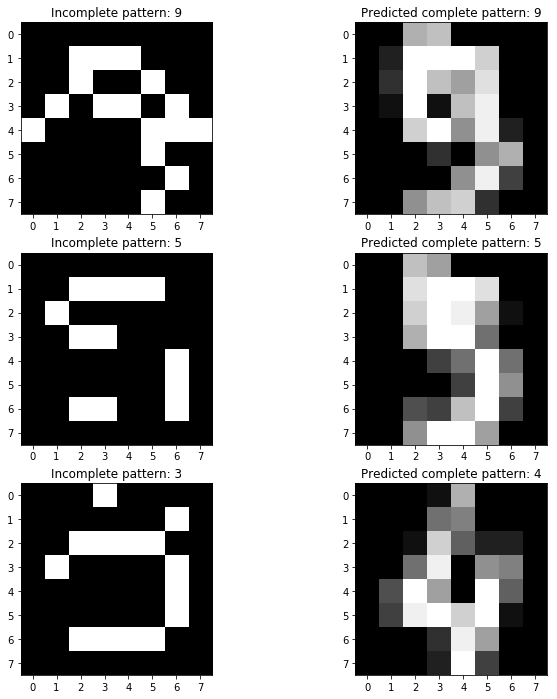

In [23]:
#5
incomplete_pattern_5 = [[0,0,0,0,0,0,0,0],
                        [0,0,1,1,1,1,0,0],
                        [0,1,0,0,0,0,0,0],
                        [0,0,1,1,0,0,0,0],
                        [0,0,0,0,0,0,1,0],
                        [0,0,0,0,0,0,1,0],
                        [0,0,1,1,0,0,1,0],
                        [0,0,0,0,0,0,0,0]]

#3
incomplete_pattern_3 = [[0,0,0,1,0,0,0,0],
                        [0,0,0,0,0,0,1,0],
                        [0,0,1,1,1,1,0,0],
                        [0,1,0,0,0,0,1,0],
                        [0,0,0,0,0,0,1,0],
                        [0,0,0,0,0,0,1,0],
                        [0,0,1,1,1,1,0,0],
                        [0,0,0,0,0,0,0,0]]

#9
incomplete_pattern_9 = [[0,0,0,0,0,0,0,0],
                        [0,0,1,1,1,0,0,0],
                        [0,0,1,0,0,1,0,0],
                        [0,1,0,1,1,0,1,0],
                        [1,0,0,0,0,1,1,1],
                        [0,0,0,0,0,1,0,0],
                        [0,0,0,0,0,0,1,0],
                        [0,0,0,0,0,1,0,0]]

incomplete_pattern_9 = np.array(incomplete_pattern_9).reshape(1, -1)
incomplete_pattern_5 = np.array(incomplete_pattern_5).reshape(1, -1)
incomplete_pattern_3 = np.array(incomplete_pattern_3).reshape(1, -1)

# Predict the complete pattern from the incomplete one
predicted_label_9 = clf.predict(incomplete_pattern_9)
predicted_label_5 = clf.predict(incomplete_pattern_5)
predicted_label_3 = clf.predict(incomplete_pattern_3)

fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(hspace=0.2, wspace=0)

# Plot the original and predicted patterns
#9
plt.subplot(3, 2, 1)
plt.imshow(incomplete_pattern_9.reshape(8,8), cmap='gray')
plt.title("Incomplete pattern: 9")
plt.xticks(np.arange(0,8,1))
plt.yticks(np.arange(0,8,1))

plt.subplot(3, 2, 2)
plt.imshow(digits.images[predicted_label_9[0]], cmap='gray')
plt.title("Predicted complete pattern: " + str(predicted_label_9[0]))
plt.xticks(np.arange(0,8,1))
plt.yticks(np.arange(0,8,1))

#5
plt.subplot(3, 2, 3)
plt.imshow(incomplete_pattern_5.reshape(8,8), cmap='gray')
plt.title("Incomplete pattern: 5")
plt.xticks(np.arange(0,8,1))
plt.yticks(np.arange(0,8,1))

plt.subplot(3, 2, 4)
plt.imshow(digits.images[predicted_label_5[0]], cmap='gray')
plt.title("Predicted complete pattern: " + str(predicted_label_5[0]))
plt.xticks(np.arange(0,8,1))
plt.yticks(np.arange(0,8,1))

#3
plt.subplot(3, 2, 5)
plt.imshow(incomplete_pattern_3.reshape(8,8), cmap='gray')
plt.title("Incomplete pattern: 3")
plt.xticks(np.arange(0,8,1))
plt.yticks(np.arange(0,8,1))

plt.subplot(3, 2, 6)
plt.imshow(digits.images[predicted_label_3[0]], cmap='gray')
plt.title("Predicted complete pattern: " + str(predicted_label_3[0]))
plt.xticks(np.arange(0,8,1))
plt.yticks(np.arange(0,8,1))
plt.show()


